# Main Jupyter Noootbook

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from nlp_preprocessing import VIA_GoGo
import seaborn as sns
import gensim
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


### Data Overview

In [3]:
tweet_df = pd.read_csv('data\db_tweet_emotion.csv', encoding= 'unicode_escape')

In [4]:
tweet_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [5]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
tweet_df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [7]:
tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [8]:
tweet_df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

### Clean Up & Tokenize

In [9]:
# Instantiating tokenizer
tokenizer = RegexpTokenizer(r"(?u)\b\w\w+\b")

# Create a list of stopwords in English
sw = stopwords.words('english')

In [10]:
# instantiating Via_GoGo()
vg = VIA_GoGo()

# Creating a cleaned and shaped dataframe
clean_df = vg.clean_tokenizer(tweet_df, tokenizer, sw)
clean_df

,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,-1,Apple,"[wesley83, 3g, iphone, hr, tweeting, rise_aust...",wesley83 3g iphone hr tweeting rise_austin dea...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,1,Apple,"[jessedee, know, fludapp, awesome, ipad, iphon...",jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,1,Apple,"[swonderlin, wait, ipad, also, sale, sxsw]",swonderlin wait ipad also sale sxsw
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,-1,Apple,"[sxsw, hope, year, festival, crashy, year, iph...",sxsw hope year festival crashy year iphone app...
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,1,Google,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...,...,...,...
9084,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,0,Google,"[mention, yup, third, app, yet, android, sugge...",mention yup third app yet android suggestion s...
9085,ipad everywhere. #sxsw {link},iPad,Positive emotion,1,Apple,"[ipad, everywhere, sxsw, link]",ipad everywhere sxsw link
9086,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,0,Google,"[wave, buzz, rt, mention, interrupt, regularly...",wave buzz rt mention interrupt regularly sched...
9087,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,0,Google,"[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...


In [11]:
binary_df = clean_df[clean_df.emotion_num != 0]

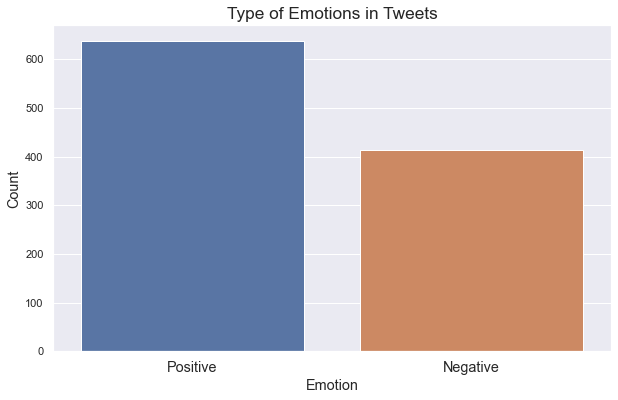

In [12]:
# visualize the counts of each emotion type
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=binary_df, 
    x="directed_at",
    order=binary_df.brand.value_counts().index)

ax.set_title('Type of Emotions in Tweets',fontsize='x-large')
ax.set_xlabel('Emotion',fontsize='large')
ax.set_ylabel('Count',fontsize='large')
plt.xticks(range(2), ['Positive','Negative'],fontweight='light', fontsize='large')

plt.show();

### Modeling Sections
1. Baseline
2. Tuned
3. Word2Vec
4. Neural Network

In [13]:
X_train, X_test, y_train, y_test = train_test_split(binary_df.joined_tokens, 
                                                    binary_df.emotion, 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [14]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(clean_df.joined_tokens, 
                                                    clean_df.emotion, 
                                                    test_size= 0.25,
                                                    random_state= 5)

#### Baseline

In [15]:
# Using Linear Support Vector Machine
sgd = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier()),
              ])

# Using Naive Bayes
naive = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

# Using Logistic Regression
lin_reg = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])


In [16]:
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8782412626832018


In [17]:
naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8331454340473506


In [18]:
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8365276211950394


#### Tuned

##### Binary

In [19]:
sgd_tuned = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SGDClassifier())
              ])
sgd_tuned.fit(X_train, y_train)

y_pred = sgd_tuned.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8906426155580609


In [20]:
naive_tuned = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naive_tuned.fit(X_train, y_train)

y_pred = naive_tuned.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8421645997745209


In [21]:
lin_reg_tuned = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=5)),
              ])
lin_reg_tuned.fit(X_train, y_train)

y_pred = lin_reg_tuned.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.830890642615558


##### Multiclass

In [37]:
sge_tuned_mc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SGDClassifier())
              ])
sge_tuned_mc.fit(X_train_mc, y_train_mc)

y_pred = sge_tuned_mc.predict(X_test_mc)

print('accuracy %s' % accuracy_score(y_pred, y_test_mc))

accuracy 0.7030356357237132


In [38]:
naive_tuned_mc = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naive_tuned_mc.fit(X_train_mc, y_train_mc)

y_pred = naive_tuned_mc.predict(X_test_mc)

print('accuracy %s' % accuracy_score(y_pred, y_test_mc))

accuracy 0.6612406511218654


In [39]:
lin_reg_tuned_mc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=5)),
              ])
lin_reg_tuned_mc.fit(X_train_mc, y_train_mc)

y_pred = lin_reg_tuned.predict(X_test_mc)

print('accuracy %s' % accuracy_score(y_pred, y_test_mc))

accuracy 0.32028156621205456


#### Word2Vec

In [22]:
model_w2v = gensim.models.Word2Vec(
            sentences=binary_df.tweet_text_tokenized,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(binary_df.tweet_text_tokenized, total_examples=len(binary_df.tweet_text_tokenized), epochs=20)

(565258, 873220)

In [23]:
model_w2v.wv['iphone']

array([ 8.40480566e-01,  1.04406901e-01, -2.21923634e-01, -3.45284849e-01,
        2.09649891e-01, -2.59002328e-01, -1.55095205e-01, -1.46833733e-01,
        3.86625737e-01, -3.72610055e-02, -1.04466053e-02,  3.23707261e-03,
        3.79830003e-01,  2.90242672e-01,  3.06208491e-01, -1.03111193e-01,
       -6.59302920e-02,  1.01137064e-01,  4.25848365e-01,  6.54929727e-02,
       -5.54777443e-01,  6.22184500e-02,  1.13680745e-02, -4.08503376e-02,
       -4.34520282e-02,  2.96843618e-01,  4.31888923e-02,  1.14047509e-02,
        2.81761438e-01, -1.59788370e-01, -5.03734887e-01,  1.35861441e-01,
        1.71200410e-01, -1.23540990e-01,  4.75328952e-01, -7.60116279e-02,
       -2.19279259e-01, -1.51480421e-01, -2.86596239e-01, -1.55193463e-01,
        1.10469259e-01,  7.55901039e-02, -7.98735619e-02,  2.12301612e-01,
       -1.82775676e-01,  2.44058236e-01,  9.40275714e-02, -6.16497099e-01,
        2.77727544e-01,  2.49661952e-01,  7.43917301e-02,  9.74390209e-02,
        4.14096653e-01,  

In [24]:
model_w2v.wv['iphone'].shape

(200,)

In [25]:
model_w2v.wv.most_similar(positive="iphone")

[('self', 0.5908747911453247),
 ('discovr', 0.5882380604743958),
 ('bb', 0.5862107276916504),
 ('sync', 0.5803309679031372),
 ('prep', 0.5718162059783936),
 ('speedup', 0.5715924501419067),
 ('breakdown', 0.5669934153556824),
 ('3x', 0.5660941004753113),
 ('smartphone', 0.5580438375473022),
 ('yo', 0.5574155449867249)]

In [26]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [27]:
binary_df.reset_index(inplace=True, drop=True)

In [28]:
wordvec_arrays = np.zeros((len(binary_df.tweet_text_tokenized), 200))

for i in range(len(binary_df.emotion_num)):
    wordvec_arrays[i,:] = word_vector(binary_df.tweet_text_tokenized[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape   

(3548, 200)

In [29]:
wordvec_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.195388,-0.045139,-0.020904,-0.207945,-0.005804,-0.188744,0.053654,-0.148626,0.229850,-0.091707,...,0.082532,0.203358,0.064944,-0.007716,-0.202427,-0.070608,-0.146051,0.028369,0.086869,0.080180
1,0.477496,-0.123443,-0.205695,-0.082045,0.036642,-0.061317,-0.022295,-0.150696,0.274358,-0.024168,...,-0.087496,0.193107,0.024367,-0.003594,-0.327490,-0.065962,-0.191378,-0.025600,0.103692,0.053816
2,0.369176,-0.105440,-0.136747,-0.165675,-0.121585,-0.156966,-0.010812,-0.184950,0.142996,0.176414,...,-0.161702,0.347264,0.000702,0.087582,-0.220137,-0.153184,-0.142272,-0.019898,0.356575,0.033329
3,0.339806,-0.204081,-0.267234,-0.177662,-0.082248,-0.059037,-0.112684,-0.204461,0.252783,-0.050706,...,-0.093247,0.220037,0.087633,0.049236,-0.133473,-0.096022,-0.159809,-0.120670,-0.006783,0.074604
4,0.267221,0.043595,-0.076521,-0.036774,-0.132434,-0.141688,0.128191,-0.125312,0.029950,-0.167062,...,0.070714,0.193034,0.159536,0.151757,-0.153612,-0.097587,-0.125206,-0.079056,0.194694,0.082846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.296825,-0.094026,-0.057181,-0.160952,-0.026103,-0.076795,0.088006,-0.161856,0.082427,0.030869,...,-0.051621,0.152122,0.152381,0.096345,-0.218009,-0.127479,-0.176919,-0.002204,0.175682,0.176534
3544,0.447237,-0.165526,-0.199718,-0.239787,-0.127820,-0.237660,-0.061822,-0.123308,0.135005,-0.129812,...,-0.188377,0.215287,0.090052,0.207491,-0.163849,-0.087615,-0.037014,-0.032148,0.036740,0.257301
3545,0.407153,-0.064706,-0.082147,-0.163622,0.010846,-0.191077,0.014353,0.030741,0.111978,-0.057722,...,-0.046559,0.266897,0.177574,0.168708,-0.231362,-0.050809,-0.067201,-0.052030,0.015026,0.151459
3546,0.357379,-0.052504,-0.138399,-0.061771,-0.043778,-0.082938,-0.028001,-0.065955,0.211571,-0.078986,...,-0.073934,0.158032,0.107940,0.097200,-0.183046,-0.067450,-0.186423,-0.086903,0.055031,0.100183


In [30]:
X_train, X_test, y_train, y_test = train_test_split(wordvec_df, 
                                                    binary_df.emotion_num, 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [31]:
rfc = RandomForestClassifier(n_estimators=500, criterion='gini', verbose=1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy 0.8613303269447576


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [32]:
clf = SGDClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8320180383314544


#### Neural Network

In [33]:
X_train, X_test, y_train, y_test = train_test_split(binary_df.joined_tokens,
                                                    binary_df.emotion_num, 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [34]:
tfidf = TfidfVectorizer()

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

X_train_vec.shape

(2661, 4750)

In [35]:
model = Sequential()
model.add(layers.Dense(600, input_dim=(4750), activation='relu'))
model.add(Dropout(.1))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train_vec, y_train, epochs=25, batch_size=100, validation_split=.25, verbose=1)

### Model Improvement / Graphs / Confusion Matrix